In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', low_memory=False)
print("Shape:", df.shape)
display(df.head(5))

Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [37]:
# Data types
print(df.dtypes)

# Total missing values
print("Total missing values:", df.isnull().sum().sum())

# Missing values by column (top 30)
display(df.isnull().sum().sort_values(ascending=False).head(30))


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
NumberOfDoors                   552
VehicleType                     552
kilowatts                       552
cubiccapacity                   552
Cylinders                       552
Model                           552
make                            552
VehicleIntroDate                552
bodytype                        552
mmcode                          552
CapitalOutstanding                2
TermFrequency                     0
CalculatedPremiumPerTerm          0
ExcessSelected                    0
CoverCategory                     0
CoverType                         0
CoverGroup                  

In [38]:
numeric_cols = ['TotalPremium','TotalClaims','CalculatedPremiumPerTerm','SumInsured','CustomValueEstimate',
                'RegistrationYear','Cylinders','NumberOfDoors']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [39]:
# Create ClaimFlag (1 if claim exists)
df['ClaimFlag'] = np.where(df['TotalClaims'] > 0, 1, 0)

# Loss ratio and margin
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace({0: np.nan})
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Overview
display(df[['TotalPremium','TotalClaims','LossRatio','ClaimFlag','Margin']].describe())


,TotalPremium,TotalClaims,LossRatio,ClaimFlag,Margin
count,1.000098e+06,1.000098e+06,618464.000000,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,0.349885,2.787727e-03,-2.955694e+00
std,2.302845e+02,2.384075e+03,9.286479,5.272531e-02,2.367137e+03
min,-7.825768e+02,-1.200241e+04,-18.700122,0.000000e+00,-3.928486e+05
25%,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00,0.000000,0.000000e+00,2.157687e+00
75%,2.192982e+01,0.000000e+00,0.000000,0.000000e+00,2.192982e+01
max,6.528260e+04,3.930921e+05,2553.600000,1.000000e+00,6.528260e+04


In [40]:
# KPIs
total_prem = df['TotalPremium'].sum(skipna=True)
total_claims = df['TotalClaims'].sum(skipna=True)
loss_ratio_overall = total_claims / total_prem
claim_freq_overall = df['ClaimFlag'].mean()
claim_severity_overall = df.loc[df['ClaimFlag']==1,'TotalClaims'].mean()

print(f"TotalPremium = {total_prem:.2f}")
print(f"TotalClaims  = {total_claims:.2f}")
print(f"Loss Ratio (portfolio) = {loss_ratio_overall:.4f}")
print(f"Claim Frequency = {claim_freq_overall:.4f}")
print(f"Average Claim Severity (given claim) = {claim_severity_overall:.2f}")


TotalPremium = 61911562.70
TotalClaims  = 64867546.17
Loss Ratio (portfolio) = 1.0477
Claim Frequency = 0.0028
Average Claim Severity (given claim) = 23273.39


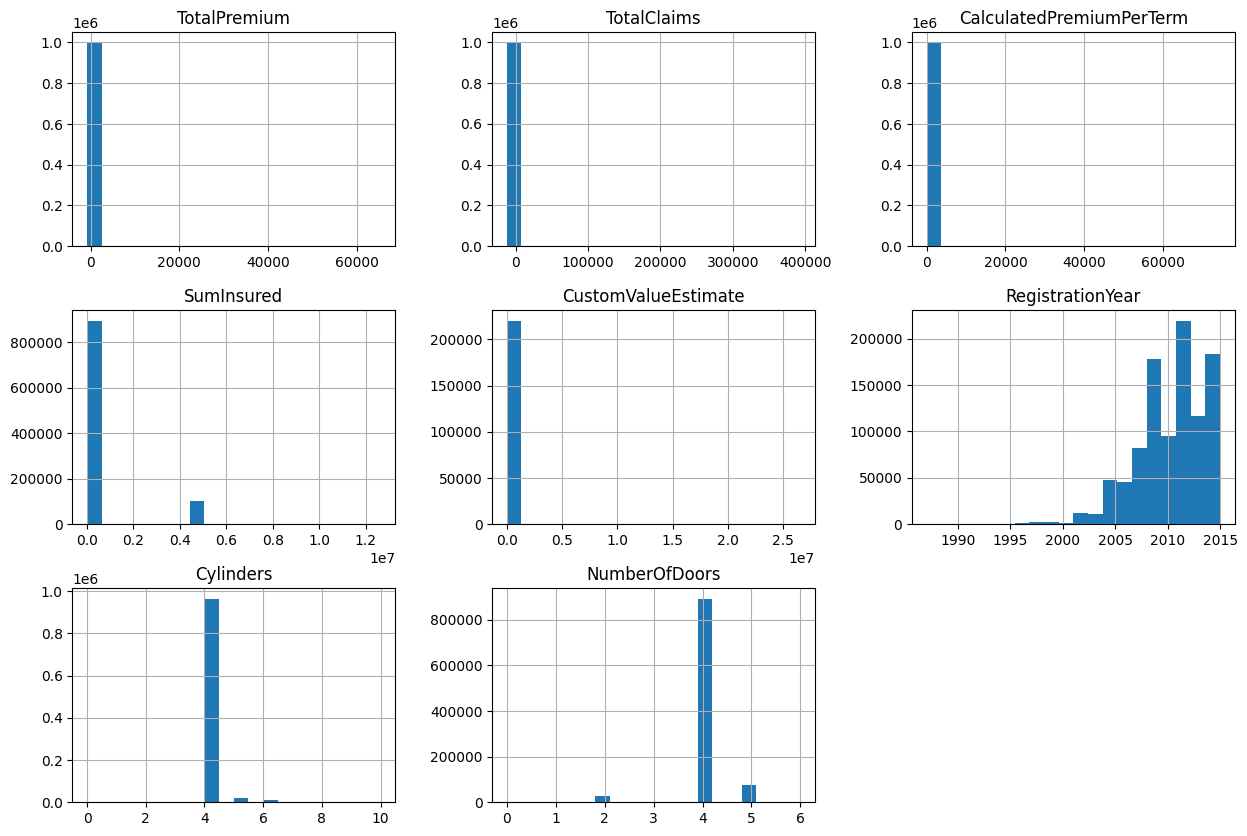

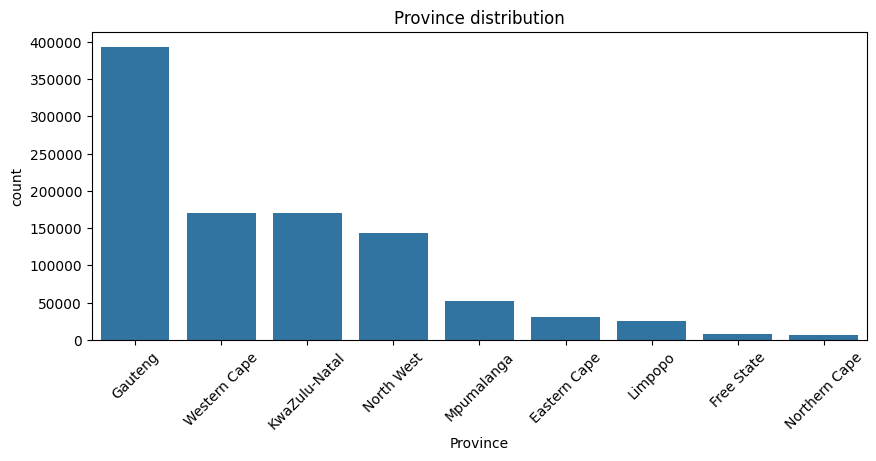

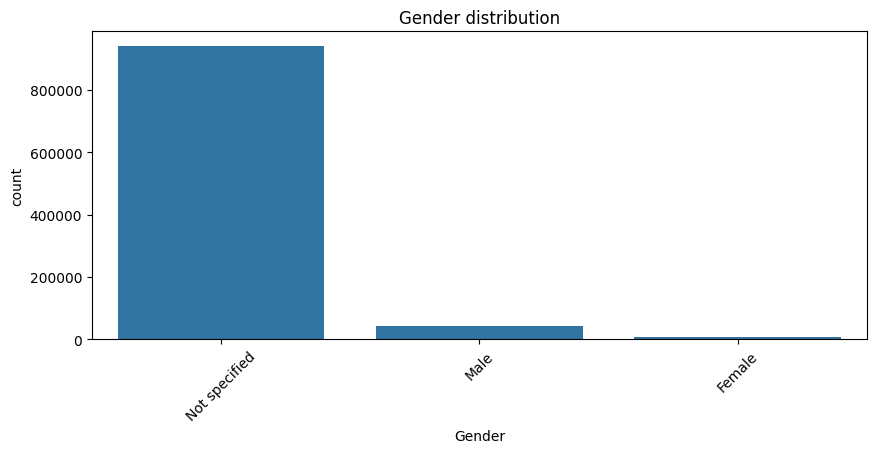

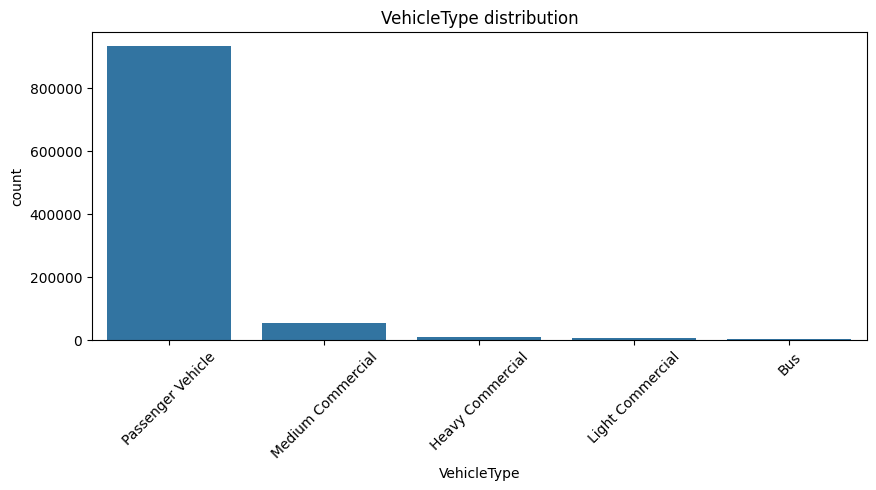

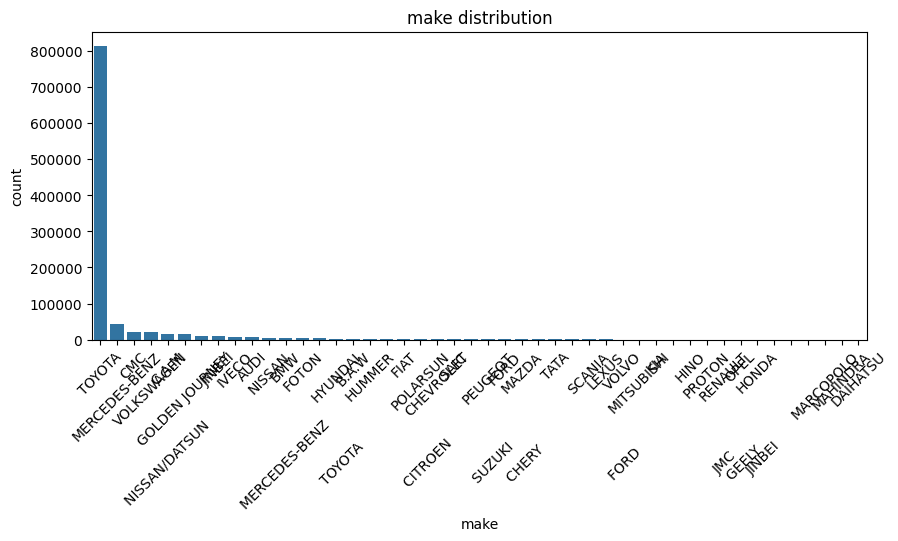

In [41]:
# Histograms for numeric columns
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.show()

# Bar charts for categorical columns
categorical_cols = ['Province','Gender','VehicleType','make']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} distribution')
    plt.show()


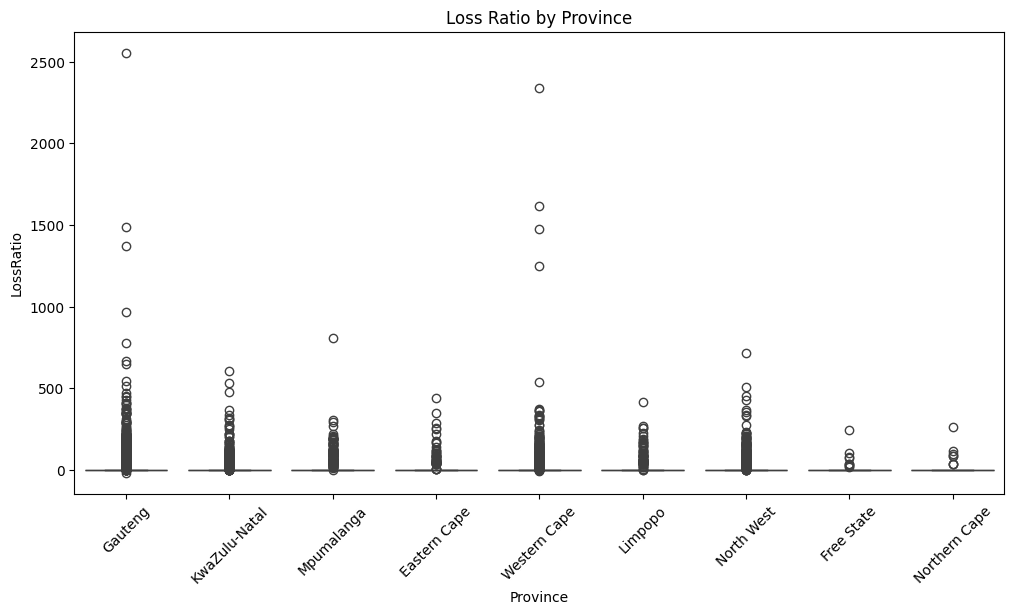

Gender
Female           0.002073
Male             0.002195
Not specified    0.002833
Name: ClaimFlag, dtype: float64


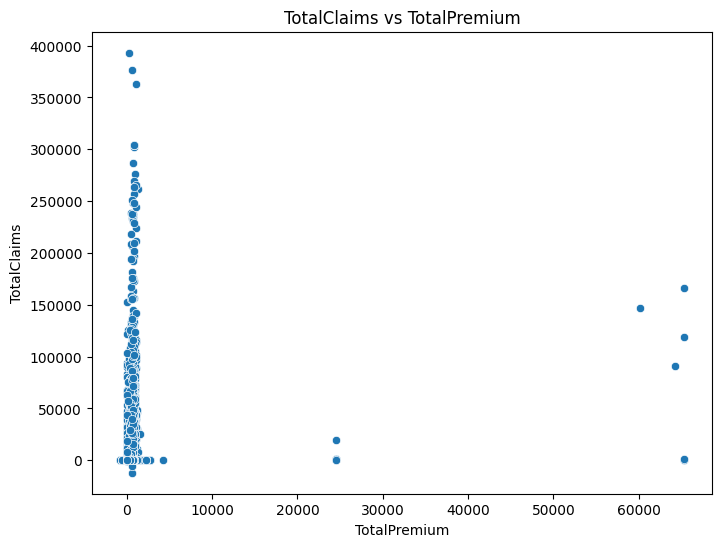

In [42]:
# LossRatio by Province
plt.figure(figsize=(12,6))
sns.boxplot(x='Province', y='LossRatio', data=df)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()

# Claim frequency by Gender
gender_claim_freq = df.groupby('Gender')['ClaimFlag'].mean()
print(gender_claim_freq)

# TotalClaims vs TotalPremium scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title("TotalClaims vs TotalPremium")
plt.show()


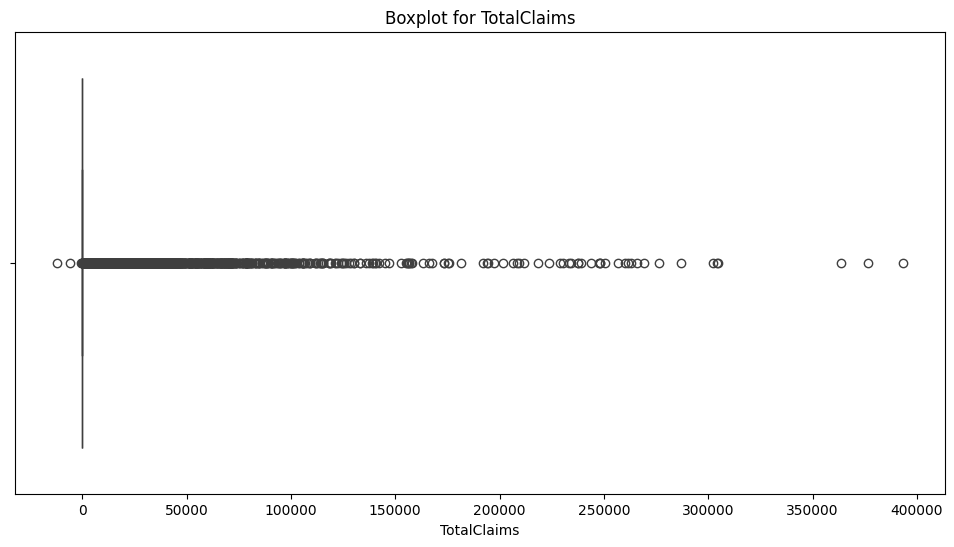

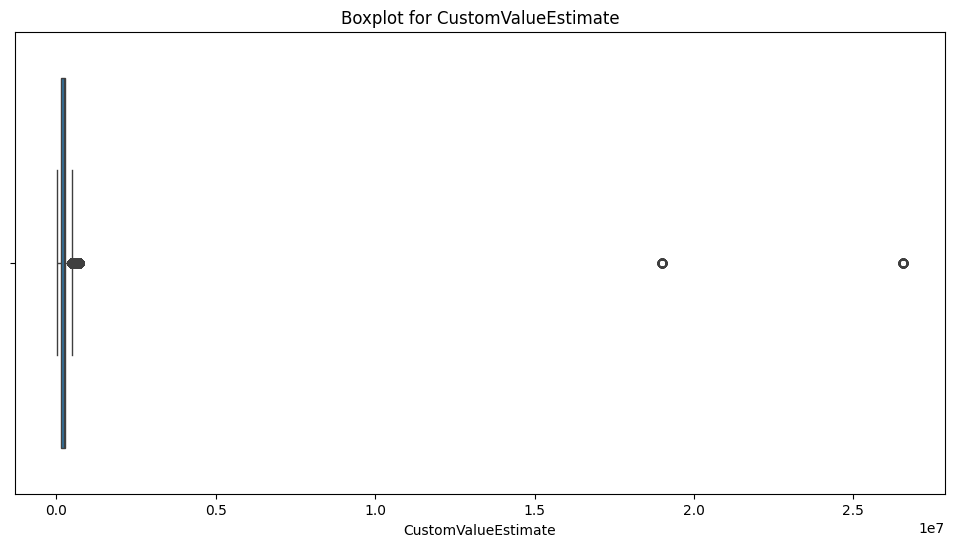

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='TotalClaims', data=df)
plt.title("Boxplot for TotalClaims")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='CustomValueEstimate', data=df)
plt.title("Boxplot for CustomValueEstimate")
plt.show()
